In [46]:
print("Hello, World!")

Hello, World!


In [47]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv(r'C:\Users\Acer\Downloads\Implement ANN\Implement ANN\breast-cancer-wisconsin.csv')

In [49]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [51]:
df.shape

(569, 33)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [53]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [54]:
# remove unnamed column
df.drop('Unnamed: 32',axis=1,inplace=True)

In [55]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

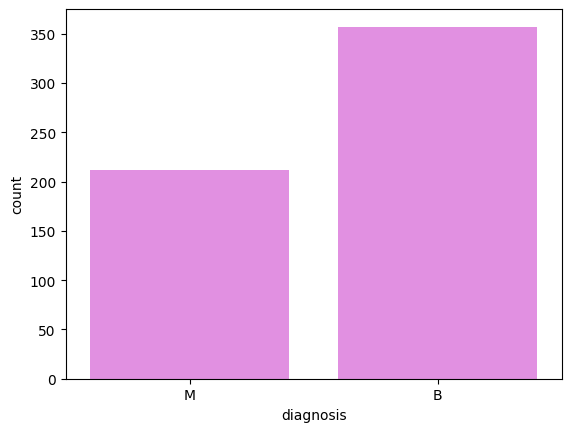

In [56]:
sns.countplot(x='diagnosis',data=df,color='violet')

In [57]:
df['benign_0_mal_1']=0
df.loc[df['diagnosis']=='M','benign_0_mal_1']=1

In [58]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign_0_mal_1
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


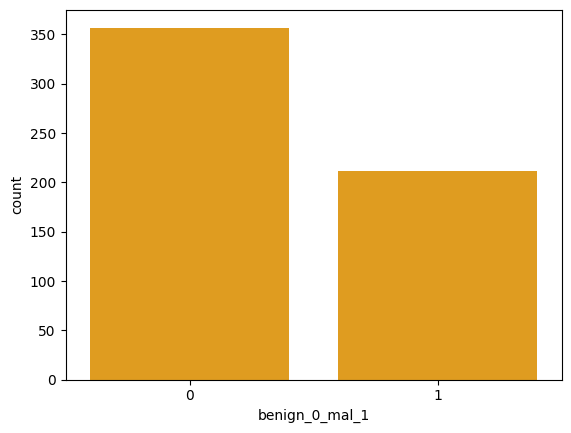

In [59]:
sns.countplot(x='benign_0_mal_1',data=df,color='orange')
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [61]:
df.drop(['id'],axis=1,inplace=True)

In [62]:
df.drop(['diagnosis'],axis=1,inplace=True)

In [63]:
df.shape

(569, 31)

In [64]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign_0_mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [65]:
# independent and dependent features
X=df.drop(['benign_0_mal_1'],axis=1)

In [66]:
# dependent feature
y=df['benign_0_mal_1']

In [67]:
X.shape

(569, 30)

In [68]:
y.shape

(569,)

In [69]:
df.describe

<bound method NDFrame.describe of      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concav

In [70]:
#apply min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [71]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [72]:
# ANN WITH SKLEARN
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(10,10),max_iter=100)
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100)

In [73]:
model.score(X_test,y_test)

0.9649122807017544

In [74]:
# build ann with tensorflow 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer  

In [75]:
model = Sequential()
model.add(InputLayer(input_shape=(30,)))    #input layer
model.add(Dense(10,activation='relu',input_shape=(30,))) #first hidden layer
model.add(Dense(10,activation='relu'))  #second hidden layer
model.add(Dense(1,activation='sigmoid'))  #output layer

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                310       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431 (1.68 KB)
Trainable params: 431 (1.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5648
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6923
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.6813
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.7648
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.8242
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.8308
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.8484
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8571
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8593
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8659
Epoch 11/

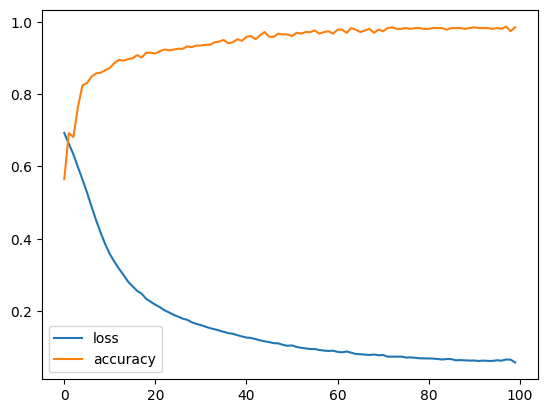

In [78]:
# 
import matplotlib.pyplot as plt
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

In [79]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)
model.fit(X_train,y_train,epochs=100,
             validation_data=(X_test,y_test),
             callbacks=[early_stop])

Epoch 1/100
15/15 [==============================] - 0s 13ms/step - loss: 0.0594 - accuracy: 0.9890 - val_loss: 0.0625 - val_accuracy: 0.9825
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0588 - accuracy: 0.9846 - val_loss: 0.0629 - val_accuracy: 0.9825
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9802 - val_loss: 0.0622 - val_accuracy: 0.9825
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9846 - val_loss: 0.0624 - val_accuracy: 0.9825
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.9846 - val_loss: 0.0626 - val_accuracy: 0.9825
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0573 - accuracy: 0.9846 - val_loss: 0.0622 - val_accuracy: 0.9825
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9846 - val_loss: 0.0622 - val_accuracy: 0.9825
Epoch 8/100


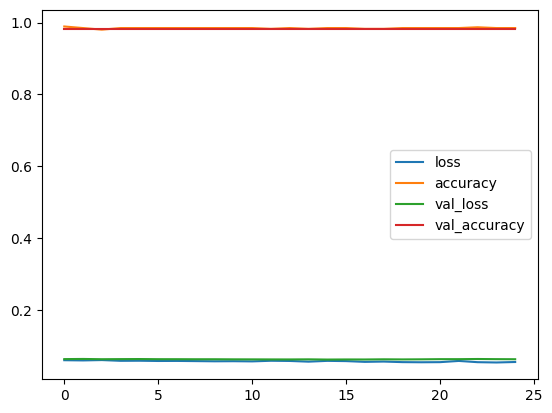

In [80]:
# 
import matplotlib.pyplot as plt
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

In [81]:
# save model
model.save('breast_cancer_model.h5')

In [82]:
# save scalar parameters
import pickle
with open('BC_scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

# for pedictions on new input

In [84]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
import pickle

warnings.filterwarnings("ignore")

# Load the model
model = tf.keras.models.load_model(R'C:\Users\Acer\Downloads\Implement ANN\Implement ANN\breast_cancer_model.h5')

# load scalar parameters
# Load fitted scaler
with open("BC_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)


# Example input data (replace with your own data)
# Ensure you include all 30 features expected by the model
input_data = {
    'radius_mean': [14.0],
    'texture_mean': [20.0],
    'perimeter_mean': [90.0],
    'area_mean': [600.0],
    'smoothness_mean': [0.1],
    'compactness_mean': [0.15],
    'concavity_mean': [0.2],
    'concave points_mean': [0.1],
    'symmetry_mean': [0.2],
    'fractal_dimension_mean': [0.06],
    'radius_se': [0.2],
    'texture_se': [1.0],
    'perimeter_se': [1.5],
    'area_se': [20.0],
    'smoothness_se': [0.005],
    'compactness_se': [0.02],
    'concavity_se': [0.03],
    'concave points_se': [0.01],
    'symmetry_se': [0.03],
    'fractal_dimension_se': [0.004],
    'radius_worst': [16.0],
    'texture_worst': [25.0],
    'perimeter_worst': [105.0],
    'area_worst': [800.0],
    'smoothness_worst': [0.12],
    'compactness_worst': [0.2],
    'concavity_worst': [0.3],
    'concave points_worst': [0.15],
    'symmetry_worst': [0.25],
    'fractal_dimension_worst': [0.08]
}

# Convert to DataFrame
input_df = pd.DataFrame(input_data)

# Preprocess the input data (normalize, scale, etc.)
input_array = scaler.transform(input_df)  # Directly use the transformed array

# Make predictions
predictions = model.predict(input_array)

# For binary classification, convert probabilities to class labels
predicted_classes = (predictions > 0.5).astype("int32")  # Assuming a threshold of 0.5

# # Example mapping for binary classification
class_mapping = {0: 'Benign', 1: 'Malignant'}

# List comprehension to map predicted class labels to their corresponding names
predicted_class_names = []
for label in predicted_classes:
    predicted_class_names.append(class_mapping[label[0]])


print(predicted_class_names)

1/1 [==============================] - 0s 140ms/step
['Malignant']
